<a href="https://colab.research.google.com/github/kauesaula/Heart-Disease-Dataset/blob/main/Projeto_Machine_Leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colunas do meu DF

# Heart Disease Dataset


In [1]:
# link para a base de dados https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?resource=download

#Significado das colunas

# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code | GENERO 1(WOMEN) 2(MEN)
# Systolic blood pressure | Examination Feature | ap_hi | int |
# Diastolic blood pressure | Examination Feature | ap_lo | int |
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: MEDIO, 3:RUIM|
# Glucose | Examination Feature | gluc | 1: normal, 2: MEDIO, 3: RUIM |
# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary |
# Physical activity | Subjective Feature | active | binary |

#Link sobre o standard scale: https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/#:~:text=Standard%20Scaler&text=Na%20documenta%C3%A7%C3%A3o%2C%20eles%20explicam,mais%20manej%C3%A1veis%20para%20nossos%20modelos

# Importantando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# Separação dos arquivos treino, teste
from sklearn.model_selection import train_test_split

#calcula a acurácia do modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# aplicação prática de machine learning
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go #bib que tem todos os meus graficos


In [4]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_cardio = pd.read_csv('/content/drive/MyDrive/cardio_train.csv',sep=";", index_col=0)

# Conferindo meu DataSet

In [6]:
df_cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


# 1.0 Fazendo tratamento dos dados

In [7]:
#verificando os tipos dos dados
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


1.1 conferindo dados faltantes

In [8]:
#Vou conferir se tem algum dado faltante
df_cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

1.2 conferindo dados identicos

In [9]:
#Vou conferir se tem alguma linha repetida no dataframe
df_cardio.duplicated()

id
0        False
1        False
2        False
3        False
4        False
         ...  
99993    False
99995    False
99996    False
99998    False
99999    False
Length: 70000, dtype: bool

1.3 quantificando as linhas duplicadas

In [10]:
#Vou ver quantas linhas duplicadas existem
df_cardio.duplicated().sum()

24

1.4 Eliminando valores duplicados

In [11]:
#Eliminando Valores Duplicados
dc = df_cardio.drop_duplicates()
dc

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


1.5 Verificando outliers dos dados

"Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade."


In [12]:
#vendo a parte mais estatisca do meu dataframe
dc.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


1.6 Tratamento dos outliers

In [13]:
#tirando os outliers da pressao minima
dc['ap_lo'].quantile(0.90)
dc1 = dc[dc['ap_lo'] < dc['ap_lo'].quantile(0.90)]

In [14]:
#tirando o outlier da pressao maxima
dc1['ap_hi'].quantile(0.90)
dc2 = dc1[dc1['ap_hi'] < dc1['ap_hi'].quantile(0.90)]

In [15]:
#tirando o outlier do peso
dc2['weight'].quantile(0.90)
dc3 = dc2[dc2['weight'] < dc2['weight'].quantile(0.90)]

In [16]:
#tirando o outlier da altura
dc3['height'].quantile(0.90)
dc4 = dc3[dc3['height'] < dc3['height'].quantile(0.90)]

1.7 Refazendo o grafico de outliers e o describe para conferir se nosso tratamento deu certo

In [17]:
dc4.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000,31795.000000
mean,19064.761535,1.270797,162.544708,67.268888,115.098600,75.927819,1.224815,1.169303,0.064444,0.038182,0.804152,0.302437
std,2490.462476,0.444379,6.648564,8.990923,10.105965,6.621174,0.546999,0.507776,0.245546,0.191639,0.396859,0.459321
min,10859.000000,1.000000,59.000000,21.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17261.000000,1.000000,158.000000,61.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19140.000000,1.000000,164.000000,67.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21098.000000,2.000000,168.000000,74.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23692.000000,2.000000,173.000000,86.000000,129.000000,89.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
fig = make_subplots(rows=4, cols=1)
#grafico de boxplot
#Estou vendo se meu tratamento de outliers deu certo
fig.add_trace(go.Box(x=dc4 ['height'], name='Altura'), row=1, col=1)
fig.add_trace(go.Box(x=dc4 ['weight'], name='Peso'), row=2, col=1) #distribuido pela mediana
fig.add_trace(go.Box(x=dc4 ['ap_hi'], name='Pressao Maxima'), row=3, col=1)
fig.add_trace(go.Box(x=dc4 ['ap_lo'], name='Pressao Minima'), row=4, col=1)

fig.update_layout(height=700)
fig.show()

# 2.0 Vendo a correlação entre as minhas variaveis

<Axes: >

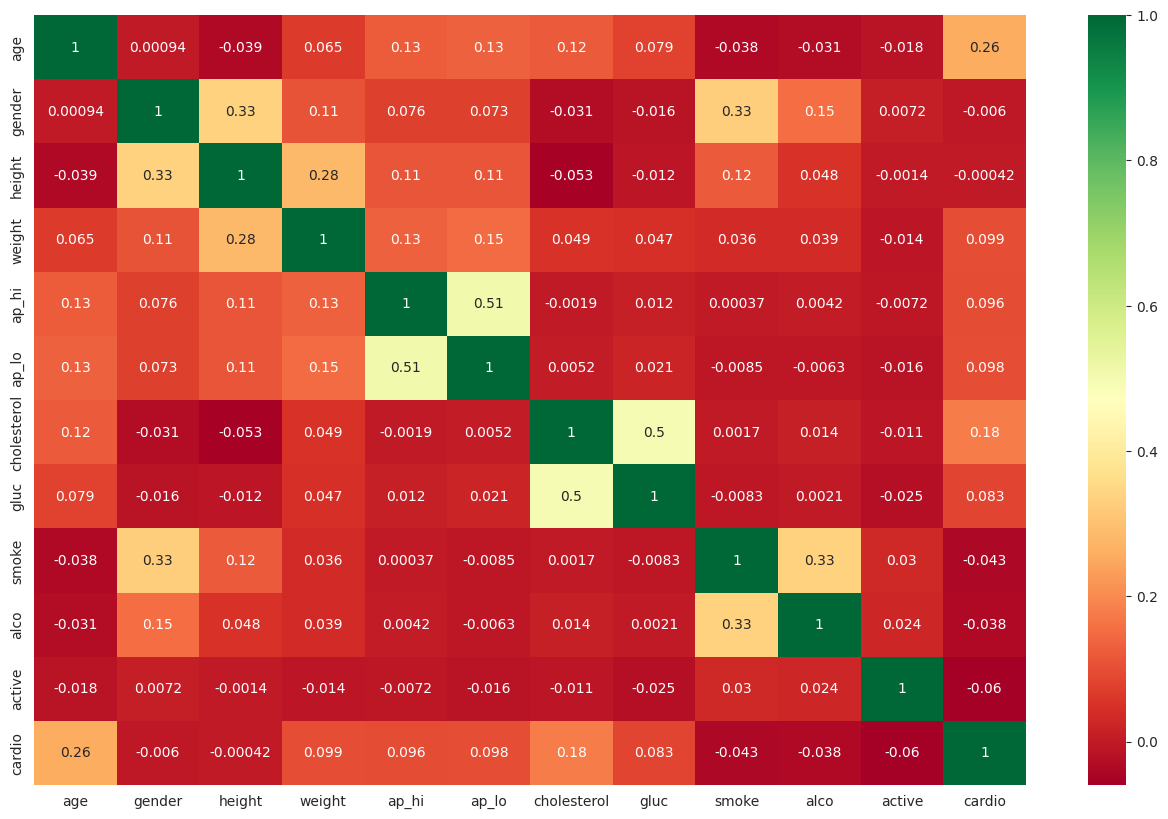

In [19]:
#Vendo a correlação entre as colunas
plt.figure(figsize = (16, 10))
sns.heatmap(dc4.corr(), annot=True, cmap="RdYlGn")

# 3.0 Separando minhas variaveis

In [20]:
#Vendo os valores unicos da tabela.
#isso é feito para ajudar a identificar os tipos das variaveis (categoricas ou numericas)
for c in dc.columns:
  print(f'{c}: {dc[c].nunique()}')

age: 8076
gender: 2
height: 109
weight: 287
ap_hi: 153
ap_lo: 157
cholesterol: 3
gluc: 3
smoke: 2
alco: 2
active: 2
cardio: 2


In [21]:
#variveis categoricas
vc = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

#variaveis Numericas
vn = ['age', 'height', 'weight', 'ap_hi', 'ap_lo' ]

 3.1 Vendo em forma de gráficos as variaveis numericas

In [22]:
fig = make_subplots(rows=5, cols=1)
#grafico de boxplot
#estou vendo variaveis numericas aqui
fig.add_trace(go.Box(x=dc4 ['age']/365, name='Idade'), row=1, col=1)
fig.add_trace(go.Box(x=dc4 ['weight'], name='Peso'), row=2, col=1) #distribuido pela mediana
fig.add_trace(go.Box(x=dc4 ['ap_hi'], name='Pressao Maxima'), row=3, col=1)
fig.add_trace(go.Box(x=dc4 ['ap_lo'], name='Pressao Minima'), row=4, col=1)
fig.add_trace(go.Box(x=dc4 ['height'], name='Altura'), row=5, col=1)

fig.update_layout(height=700)
fig.show()

3.1.2 Minha idade em dias pelo histograma

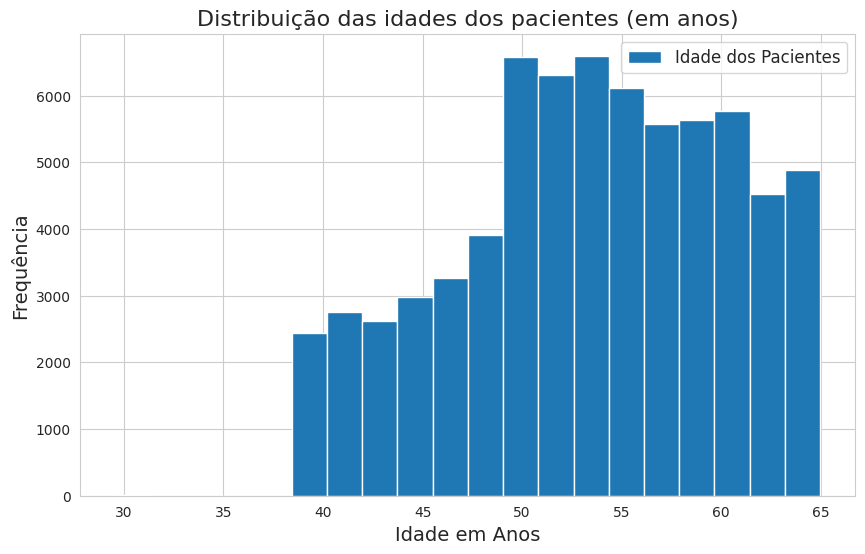

In [23]:


# Convertendo a idade de dias para anos
df_cardio['age'] = df_cardio['age'] / 365

plt.figure(figsize=(10, 6))

# Criando o histograma com a idade em anos
plt.hist(df_cardio['age'].dropna(), bins=20, label='Idade dos Pacientes')

# Adicionando título e legendas
plt.title('Distribuição das idades dos pacientes (em anos)', fontsize=16)
plt.xlabel('Idade em Anos', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(fontsize=12)

plt.show()


 3.2 Mostrando os dados das minhas variaveis categoricas

In [24]:
#vou ver variaveis categoricas Ordinais
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=3)

#variaveis categoricas
fig.add_trace(go.Bar(y=dc4["gender"].value_counts(), x=["Homem","Mulher"], name="Genero"), row=1, col=1)
fig.add_trace(go.Bar(y=dc4["cholesterol"].value_counts(), x=["Normal","Acima do Normal", "Muito Acima do Normal"], name="Cholesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=dc4["gluc"].value_counts(), x=["Normal","Acima do Normal", "Muito Acima do Normal"], name="Glicose"), row=1, col=3)
fig.add_trace(go.Bar(y=dc4["smoke"].value_counts(), x=["Não Fumante","Fumante"], name="Fumante"), row=2, col=1)
fig.add_trace(go.Bar(y=dc4["alco"].value_counts(), x=["Não Alcoólatra","Alcoólatra"], name="Alcolatra"), row=2, col=2)
fig.add_trace(go.Bar(y=dc4["active"].value_counts(), x=["Faz"," Não Faz"], name="Faz Atividade Fisica"), row=2, col=3)

fig.update_layout(height=700)
fig.show()


# 4.0 Criando hipoteses atraves da analise do DF

1.   Uma pessoa com a glicose acima do normal tem probabilidade de desenvolver doenças cardiacas ?

2.   Uma pessoa fumante e que pratica exercicio pode ter problemas cardiacos?

1.   Uma pessoa diabetica e fumante pode ter problemas cardiacos?


4.1 *Uma pessoa com a glicose acima do normal tem probabilidade de desenvolver doenças cardiacas ?*

**Não**, vemos que pessoas com glicose acima do normal (3) tem uma probabilidade de desenvolver doenças do coração, mas não em sua maioria.

In [25]:
import plotly.express as px

fig = px.histogram(dc4, x="gluc", color='cardio', barmode='group', color_discrete_map={"0": "pink", "1":"purple"})
fig.show()

4.2 Uma pessoa fumante e que pratica exercicio pode ter problemas cardiacos?

**Não**, podemos ver que a maior parte das pessoas que fumam e praticam exercicio fisico não tem problemas cardiacos

In [26]:
#filtrando o que quero mostrar
filtered_df = dc4[(dc4['active'] >= 1) & (dc4['smoke'] == 1)]

# Crie um gráfico de barras usando plotly.express
fig = px.histogram(
    filtered_df,
    x='active',
    color='cardio',
    barmode='group',
    color_discrete_sequence=['green', 'purple'],
    category_orders={'cardio': [0, 1]}
)

# Atualize os títulos e rótulos
fig.update_layout(
    title='Relação entre fumantes que praticam atividade fisica com problema do coração',
    xaxis_title='Pratica Exercicio',
    yaxis_title='Contagem',
    legend_title_text='Problema do coração'
)

# Mostre o gráfico
fig.show()

4.3 Uma pessoa diabetica e fumante pode ter problemas cardiacos?

**Não**, mesmo sendo fumante a quantidade de pessoas com o nivel de diabetes acima do normal(2) e muito acima do normal (3) ainda é menor do que as pessoas que tem o nivel normal de glicose

In [27]:
#filtrando o que quero mostrar
filtered_df = dc4[(dc4['gluc'] >= 1) & (dc4['smoke'] == 1)]

# Crie um gráfico de barras usando plotly.express
fig = px.histogram(
    filtered_df,
    x='gluc',
    color='cardio',
    barmode='group',
    color_discrete_sequence=['green', 'purple'],
    category_orders={'cardio': [0, 1]}
)

# Atualize os títulos e rótulos
fig.update_layout(
    title='Relação entre os niveis de glicose de fumantes com problema do coração',
    xaxis_title='Nível de glicose',
    yaxis_title='Contagem',
    legend_title_text='Problema do coração'
)

# Mostre o gráfico
fig.show()

# 5.0 Criando modelos de Machine Learning

In [28]:
#==================== VAMOS COMEÇAR AS PREPARAÇÕES DE MACHINE LEARNING ===========

In [29]:
#vendo o valor mais e minimo do peso
dc4['weight'].max(), dc4['weight'].min()

(86.0, 21.0)

5.1 Separando as minhas variaveis dependente e indepentes

In [30]:

Y = np.array(dc4[['cardio']]) #se a pessoa possui ou nao possui um problema cardiaco
X= np.array(dc4[['height','gender','weight','ap_hi','ap_lo','gluc','cholesterol','smoke','alco']]) #Aqui eu vou falar pra ele pegar tudo menos a coluna cardio

5.2 Treinando o modelo

In [31]:
#separei pra teste e treino
#Vai pegar os 80% dos dados (x_train,y_train)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

In [32]:
#me mostra em forma de array os dados que utilizei para o treino de forma aleatoria
x_train

array([[161.,   1.,  65., ...,   2.,   0.,   0.],
       [165.,   2.,  80., ...,   1.,   0.,   0.],
       [172.,   1.,  64., ...,   1.,   0.,   0.],
       ...,
       [172.,   2.,  82., ...,   1.,   1.,   0.],
       [145.,   1.,  66., ...,   2.,   0.,   0.],
       [168.,   2.,  61., ...,   1.,   0.,   0.]])

In [33]:
#printando o numero de linhas e colunas
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25436, 9)
(6359, 9)
(25436, 1)
(6359, 1)


# 6.0 Random Forest

In [34]:
#vou instanciar ele numa variavel
ml_model = RandomForestClassifier()
ml_model.fit(x_train, y_train)

<ipython-input-34-2947c9107467>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [35]:
#vou pedir para o meu modelo preve tudo o que ele acha das pessoas
predictions = ml_model.predict(x_test)

# 7.0 Avaliando o modelo

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcula a acurácia
accuracy = accuracy_score(y_test, predictions)

# Calcula a precisão
precision = precision_score(y_test, predictions, average='weighted')

# Calcula a revocação
recall = recall_score(y_test, predictions, average='weighted')

# Calcula o F1-Score
f1 = f1_score(y_test, predictions, average='weighted')

# Exibe as métricas de avaliação
print("Acurácia_RF:", accuracy)
print("Precisão_RF:", precision)
print("Revocação_RF:", recall)
print("F1-Score_RF:", f1)

Acurácia_RF: 0.6669287623840227
Precisão_RF: 0.6216106510249372
Revocação_RF: 0.6669287623840227
F1-Score_RF: 0.630092457752309


In [37]:
#vou comparar com os valores reais e medir a acuracia do meu ML
print(classification_report(y_test, predictions ))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.87      0.78      4433
           1       0.40      0.21      0.28      1926

    accuracy                           0.67      6359
   macro avg       0.56      0.54      0.53      6359
weighted avg       0.62      0.67      0.63      6359

[[3836  597]
 [1521  405]]


# 8.0 Fazendo outros modelos

8.1 DecisionTree com hiperparametros

Acurácia do treino: 72.31%
Acurácia do teste: 71.80%
---- REPORT DE CLASSIFICAÇÃO ----
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      4433
           1       0.61      0.19      0.29      1926

    accuracy                           0.72      6359
   macro avg       0.67      0.57      0.55      6359
weighted avg       0.69      0.72      0.66      6359

MATRIZ DE CONFUSÃO ==== 
[[4208  225]
 [1568  358]]


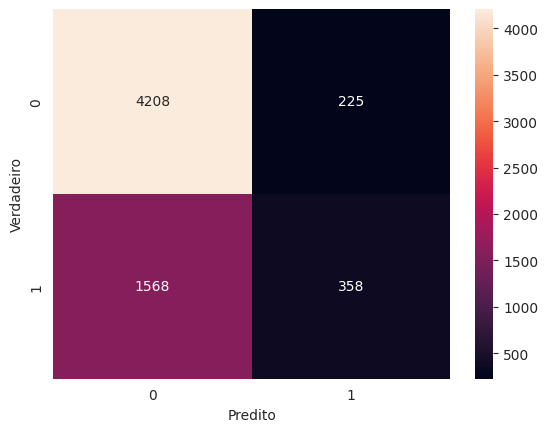

In [38]:

# y é a variável alvo (se a pessoa possui ou não possui um problema cardíaco)
y = dc4["cardio"]
X = dc4.loc[:, dc4.columns != 'cardio']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definindo hiperparâmetros para o DecisionTreeClassifier
params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_split': 4,
    'min_samples_leaf': 2
}

# Treinando o modelo com os hiperparâmetros especificados
tree = DecisionTreeClassifier(**params)
tree.fit(X_train, y_train)

# Fazendo previsões
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Calculando acurácia do treino
score_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia do treino: {score_train * 100:.2f}%')

# Calculando acurácia do teste
score_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia do teste: {score_test * 100:.2f}%')

# Report de classificação
print('---- REPORT DE CLASSIFICAÇÃO ----')
print(classification_report(y_test, y_test_pred))

# Matriz de confusão
print('MATRIZ DE CONFUSÃO ==== ')
confusao = confusion_matrix(y_test, y_test_pred)
print(confusao)

# Plotando a matriz de confusão
sns.heatmap(confusao, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

8.2 AdaBoost com hiperparametro

Acurácia do treino: 72.28%
Acurácia do teste: 71.85%
---- REPORT DE CLASSIFICAÇÃO ----
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      4433
           1       0.59      0.23      0.33      1926

    accuracy                           0.72      6359
   macro avg       0.66      0.58      0.58      6359
weighted avg       0.69      0.72      0.67      6359

MATRIZ DE CONFUSÃO ==== 
[[4131  302]
 [1488  438]]


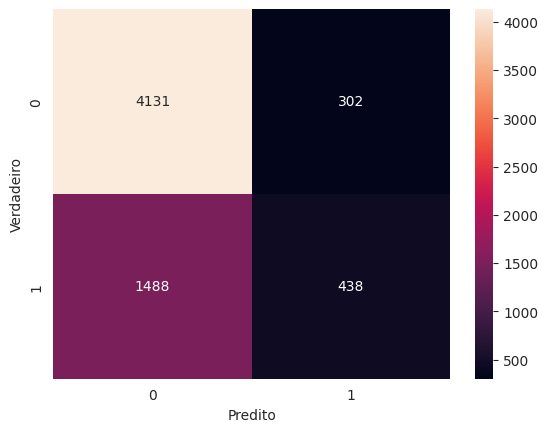

In [39]:

# y é a variável alvo (se a pessoa possui ou não possui um problema cardíaco)
y = dc4["cardio"]
X = dc4.loc[:, dc4.columns != 'cardio']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definindo hiperparâmetros para o AdaBoostClassifier
params = {
    'n_estimators': 50,
    'learning_rate': 1.0
}

# Treinando o modelo com os hiperparâmetros especificados
ada_boost = AdaBoostClassifier(**params)
ada_boost.fit(X_train, y_train)

# Fazendo previsões
y_train_pred = ada_boost.predict(X_train)
y_test_pred = ada_boost.predict(X_test)

# Calculando acurácia do treino
score_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia do treino: {score_train * 100:.2f}%')

# Calculando acurácia do teste
score_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia do teste: {score_test * 100:.2f}%')

# Report de classificação
print('---- REPORT DE CLASSIFICAÇÃO ----')
print(classification_report(y_test, y_test_pred))

# Matriz de confusão
print('MATRIZ DE CONFUSÃO ==== ')
confusao = confusion_matrix(y_test, y_test_pred)
print(confusao)

# Plotando a matriz de confusão
sns.heatmap(confusao, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

8.3 KNN com hiperparametro

Acurácia do treino: 76.67%
Acurácia do teste: 66.69%
---- REPORT DE CLASSIFICAÇÃO ----
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      4433
           1       0.43      0.28      0.34      1926

    accuracy                           0.67      6359
   macro avg       0.58      0.56      0.56      6359
weighted avg       0.64      0.67      0.64      6359

MATRIZ DE CONFUSÃO ==== 
[[3694  739]
 [1379  547]]


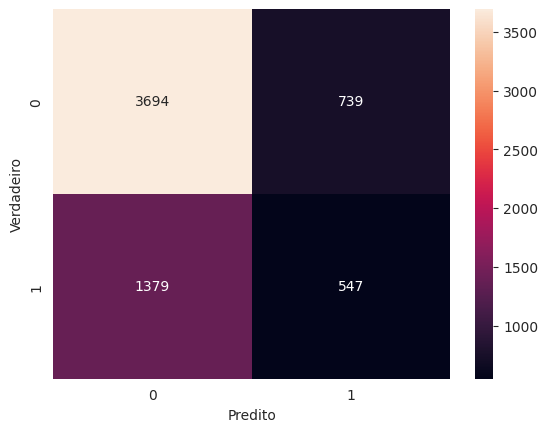

In [40]:
y = dc4["cardio"]
X = dc4.loc[:, dc4.columns != 'cardio']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definindo hiperparâmetros para o KNeighborsClassifier
params = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'algorithm': 'auto',
    'p': 2
}

# Treinando o modelo com os hiperparâmetros especificados
knn = KNeighborsClassifier(**params)
knn.fit(X_train, y_train)

# Fazendo previsões
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculando acurácia do treino
score_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia do treino: {score_train * 100:.2f}%')

# Calculando acurácia do teste
score_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia do teste: {score_test * 100:.2f}%')

# Report de classificação
print('---- REPORT DE CLASSIFICAÇÃO ----')
print(classification_report(y_test, y_test_pred))

# Matriz de confusão
print('MATRIZ DE CONFUSÃO ==== ')
confusao = confusion_matrix(y_test, y_test_pred)
print(confusao)

# Plotando a matriz de confusão
sns.heatmap(confusao, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

8.4 RandomForest com hiperparametros

Acurácia do treino: 74.68%
Acurácia do teste: 71.82%
---- REPORT DE CLASSIFICAÇÃO ----
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      4433
           1       0.61      0.20      0.30      1926

    accuracy                           0.72      6359
   macro avg       0.67      0.57      0.56      6359
weighted avg       0.69      0.72      0.66      6359

MATRIZ DE CONFUSÃO ==== 
[[4185  248]
 [1544  382]]


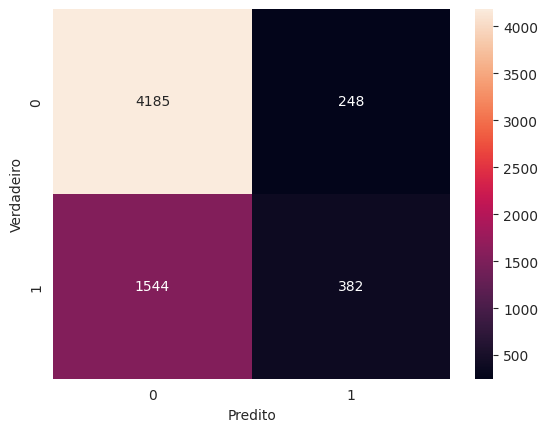

In [41]:
y = dc4["cardio"]
X = dc4.loc[:, dc4.columns != 'cardio']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definindo hiperparâmetros para o RandomForestClassifier
params = {
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}

# Treinando o modelo com os hiperparâmetros especificados
rf = RandomForestClassifier(**params)
rf.fit(X_train, y_train)

# Fazendo previsões
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculando acurácia do treino
score_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia do treino: {score_train * 100:.2f}%')

# Calculando acurácia do teste
score_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia do teste: {score_test * 100:.2f}%')

# Report de classificação
print('---- REPORT DE CLASSIFICAÇÃO ----')
print(classification_report(y_test, y_test_pred))

# Matriz de confusão
print('MATRIZ DE CONFUSÃO ==== ')
confusao = confusion_matrix(y_test, y_test_pred)
print(confusao)

# Plotando a matriz de confusão
sns.heatmap(confusao, annot=True, fmt='d')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# 9.0 Comparação dos modelos

In [42]:
# y é a variável alvo (se a pessoa possui ou não possui um problema cardíaco)
y = dc4["cardio"]
X = dc4.loc[:, dc4.columns != 'cardio']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definindo e treinando o modelo DecisionTreeClassifier
tree_params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_split': 4,
    'min_samples_leaf': 2
}
tree = DecisionTreeClassifier(**tree_params)
tree.fit(X_train, y_train)
tree_train_pred = tree.predict(X_train)
tree_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, tree_train_pred)
tree_test = accuracy_score(y_test, tree_test_pred)

# Definindo e treinando o modelo AdaBoostClassifier
ada_params = {
    'n_estimators': 50,
    'learning_rate': 1.0
}
ada_boost = AdaBoostClassifier(**ada_params)
ada_boost.fit(X_train, y_train)
ada_train_pred = ada_boost.predict(X_train)
ada_test_pred = ada_boost.predict(X_test)
ada_train = accuracy_score(y_train, ada_train_pred)
ada_test = accuracy_score(y_test, ada_test_pred)

# Definindo e treinando o modelo KNeighborsClassifier
knn_params = {
    'n_neighbors': 5,
    'weights': 'uniform',
    'algorithm': 'auto',
    'p': 2
}
knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)
kn_train_pred = knn.predict(X_train)
kn_test_pred = knn.predict(X_test)
kn_train = accuracy_score(y_train, kn_train_pred)
kn_test = accuracy_score(y_test, kn_test_pred)

# Definindo e treinando o modelo RandomForestClassifier
rf_params = {
    'n_estimators': 100,
    'criterion': 'entropy',
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'random_state': 42
}
rf = RandomForestClassifier(**rf_params)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
random_train = accuracy_score(y_train, rf_train_pred)
random_test = accuracy_score(y_test, rf_test_pred)

# Criando o DataFrame com as acurácias
data = {
    'Models': ['Decision Tree', 'Ada Boost', 'KNeighbors', 'Random Forest'],
    'Acurácia do Treino': [round(tree_train * 100, 2), round(ada_train * 100, 2), round(kn_train * 100, 2), round(random_train * 100, 2)],
    'Acurácia do Teste': [round(tree_test * 100, 2), round(ada_test * 100, 2), round(kn_test * 100, 2), round(random_test * 100, 2)]
}
df = pd.DataFrame(data)

# Ordenando o DataFrame pela acurácia do teste
df.sort_values(by='Acurácia do Teste', ascending=False, inplace=True)

# Exibindo o DataFrame
print(df)

          Models  Acurácia do Treino  Acurácia do Teste
1      Ada Boost               72.28              71.85
3  Random Forest               74.68              71.82
0  Decision Tree               72.31              71.80
2     KNeighbors               76.67              66.69


# 10.0 Melhorando os modelos

In [43]:
# Adicionando o standard scale no modelo usando as colunas numerica
# transformando eles em categoricas

In [44]:
def relatorio_scaler(dc4, algoritmo, opt=2):
    X = dc4.loc[:, dc4.columns != 'cardio']
    y = dc4['cardio']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    cols_scaler = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

    X_train[cols_scaler] = scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler] = scaler.transform(X_test[cols_scaler])

    if opt == 0:
        ml = algoritmo(max_iter=1000)
    elif opt == 1:
        ml = algoritmo(n_estimators=1000)
    else:
        ml = algoritmo()

    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f'Acuracia do treino: {score_train * 100:.2f}%')
    score_test = ml.score(X_test, y_test)
    print(f'Acuracia do teste: {score_test * 100:.2f}%')

    y_previsto = ml.predict(X_test)
    print(f' ==== REPORT DE CLASSIFICAÇÃO ====')
    print(classification_report(y_test, y_previsto))
    print(f' ==== MATRIZ DE CONFUSÃO ====')
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

    return score_train, score_test

Acuracia do treino: 99.96%
Acuracia do teste: 61.82%
 ==== REPORT DE CLASSIFICAÇÃO ====
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      4433
           1       0.38      0.39      0.38      1926

    accuracy                           0.62      6359
   macro avg       0.55      0.55      0.55      6359
weighted avg       0.62      0.62      0.62      6359

 ==== MATRIZ DE CONFUSÃO ====


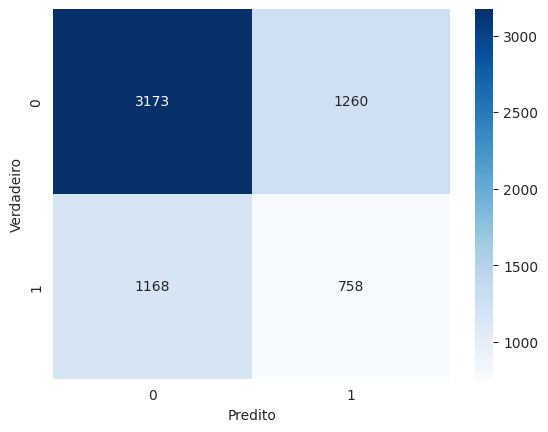

In [45]:
tree_train_scaler, tree_test_scaler = relatorio_scaler(dc4, DecisionTreeClassifier)

Acuracia do treino: 72.28%
Acuracia do teste: 71.85%
 ==== REPORT DE CLASSIFICAÇÃO ====
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      4433
           1       0.59      0.23      0.33      1926

    accuracy                           0.72      6359
   macro avg       0.66      0.58      0.58      6359
weighted avg       0.69      0.72      0.67      6359

 ==== MATRIZ DE CONFUSÃO ====


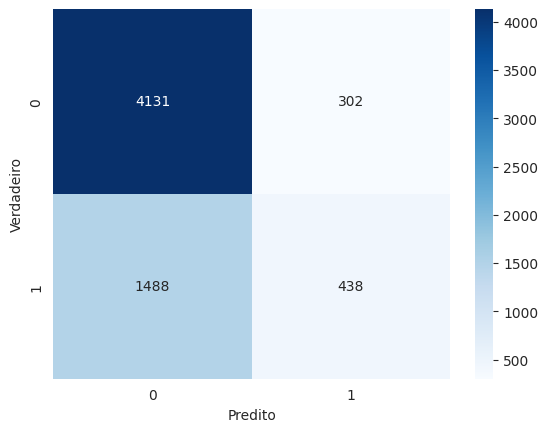

In [46]:
ada_train_scaler, ada_test_scaler = relatorio_scaler(dc4, AdaBoostClassifier)

Acuracia do treino: 77.59%
Acuracia do teste: 67.27%
 ==== REPORT DE CLASSIFICAÇÃO ====
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      4433
           1       0.44      0.30      0.36      1926

    accuracy                           0.67      6359
   macro avg       0.59      0.57      0.57      6359
weighted avg       0.64      0.67      0.65      6359

 ==== MATRIZ DE CONFUSÃO ====


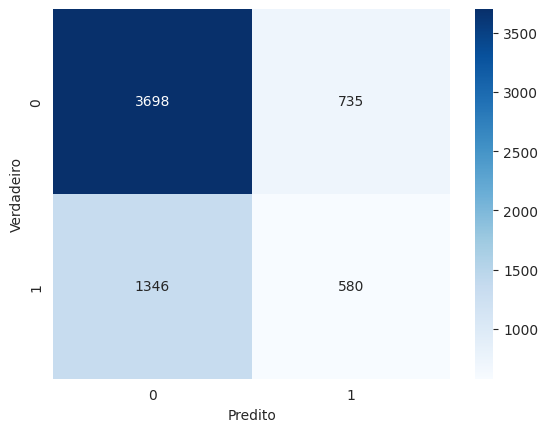

In [47]:
kn_train_scaler, kn_test_scaler = relatorio_scaler(dc4, KNeighborsClassifier)

Acuracia do treino: 99.96%
Acuracia do teste: 69.57%
 ==== REPORT DE CLASSIFICAÇÃO ====
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      4433
           1       0.50      0.32      0.39      1926

    accuracy                           0.70      6359
   macro avg       0.62      0.59      0.59      6359
weighted avg       0.67      0.70      0.67      6359

 ==== MATRIZ DE CONFUSÃO ====


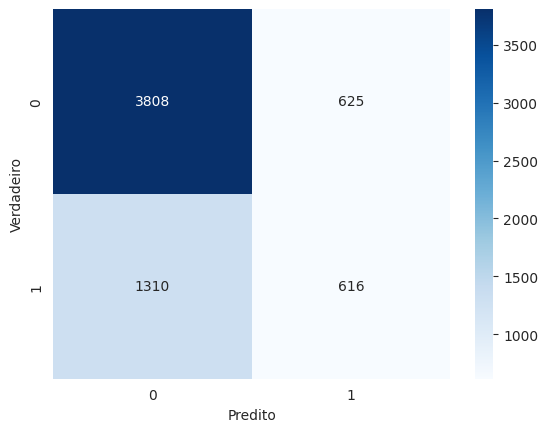

In [48]:
random_train_scaler, random_test_scaler = relatorio_scaler(dc4, RandomForestClassifier)

In [49]:

data1 = {'Models': ['Decision Tree', 'Ada Boost', 'KNeighbors', 'Random Forest'],
         'Acurácia do Treino': [round(tree_train_scaler * 100, 2), round(ada_train_scaler * 100, 2), round(kn_train_scaler * 100, 2), round(random_train_scaler * 100, 2)],
         'Acurácia do Teste': [round(tree_test_scaler * 100, 2), round(ada_test_scaler * 100, 2), round(kn_test_scaler * 100, 2), round(random_test_scaler * 100, 2)]
         }
df1 = pd.DataFrame(data1)

df1.sort_values(by='Acurácia do Teste', ascending=False, inplace=True)
df1


,Models,Acurácia do Treino,Acurácia do Teste
1,Ada Boost,72.28,71.85
3,Random Forest,99.96,69.57
2,KNeighbors,77.59,67.27
0,Decision Tree,99.96,61.82


# 11.0 Comparando os resultados dos modelos com Standard Scale e sem Standard Scale

In [50]:
# --- COMPARAÇÃO DAS DUAS TABELAS ----

In [51]:
#teste sem o standard scale
df

,Models,Acurácia do Treino,Acurácia do Teste
1,Ada Boost,72.28,71.85
3,Random Forest,74.68,71.82
0,Decision Tree,72.31,71.80
2,KNeighbors,76.67,66.69


In [52]:
#teste com o standard scale
df1

,Models,Acurácia do Treino,Acurácia do Teste
1,Ada Boost,72.28,71.85
3,Random Forest,99.96,69.57
2,KNeighbors,77.59,67.27
0,Decision Tree,99.96,61.82
